Rami, Nicola Srour (2025)

Title: Data analysis, Amazon sales report Dataset

In [144]:
# import needed libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
# show dataset and display all columns
df = pd.read_excel("Amazon Sale Report.xlsx")
pd.set_option('display.max_columns', None)
df.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [146]:
df.shape

(128975, 23)

In [147]:
# describe statistics of the dataset
df.describe()

,Date,Qty,Amount,ship-postal-code,Unnamed: 22
count,128975,128975.000000,121180.000000,128942.000000,79925.0
mean,2022-05-12 11:49:27.951928576,0.904431,648.561465,463966.236509,0.0
min,2022-03-31 00:00:00,0.000000,0.000000,110001.000000,0.0
25%,2022-04-20 00:00:00,1.000000,449.000000,382421.000000,0.0
50%,2022-05-10 00:00:00,1.000000,605.000000,500033.000000,0.0
75%,2022-06-04 00:00:00,1.000000,788.000000,600024.000000,0.0
max,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000,0.0
std,NaN,0.313354,281.211687,191476.764941,0.0


In [148]:
# check usefulness
# show unique values of 'fulfilment' column
unu = df['Fulfilment'].unique()
print(unu)

['Merchant' 'Amazon']


In [149]:
# check accruacy
# the limit of outliers
q1 = df['Amount'].quantile(0.25)
q3 = df['Amount'].quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5*IQR
upper = q3 + 1.5*IQR
print(lower, upper)

-59.5 1296.5


In [150]:
# number of outliers
out = df[(df['Amount'] < (q1-1.5*IQR)) | (df['Amount'] > (q3-1.5*IQR))]
num = len(out)
print(num)

118423


/tmp/ipython-input-151-253197483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  styles = sns.countplot(x='Style', data=df, palette=['green', 'blue', 'yellow'])
/tmp/ipython-input-151-253197483.py:4: UserWarning: 
The palette list has fewer values (3) than needed (1377) and will cycle, which may produce an uninterpretable plot.
  styles = sns.countplot(x='Style', data=df, palette=['green', 'blue', 'yellow'])


<Axes: xlabel='Style', ylabel='count'>

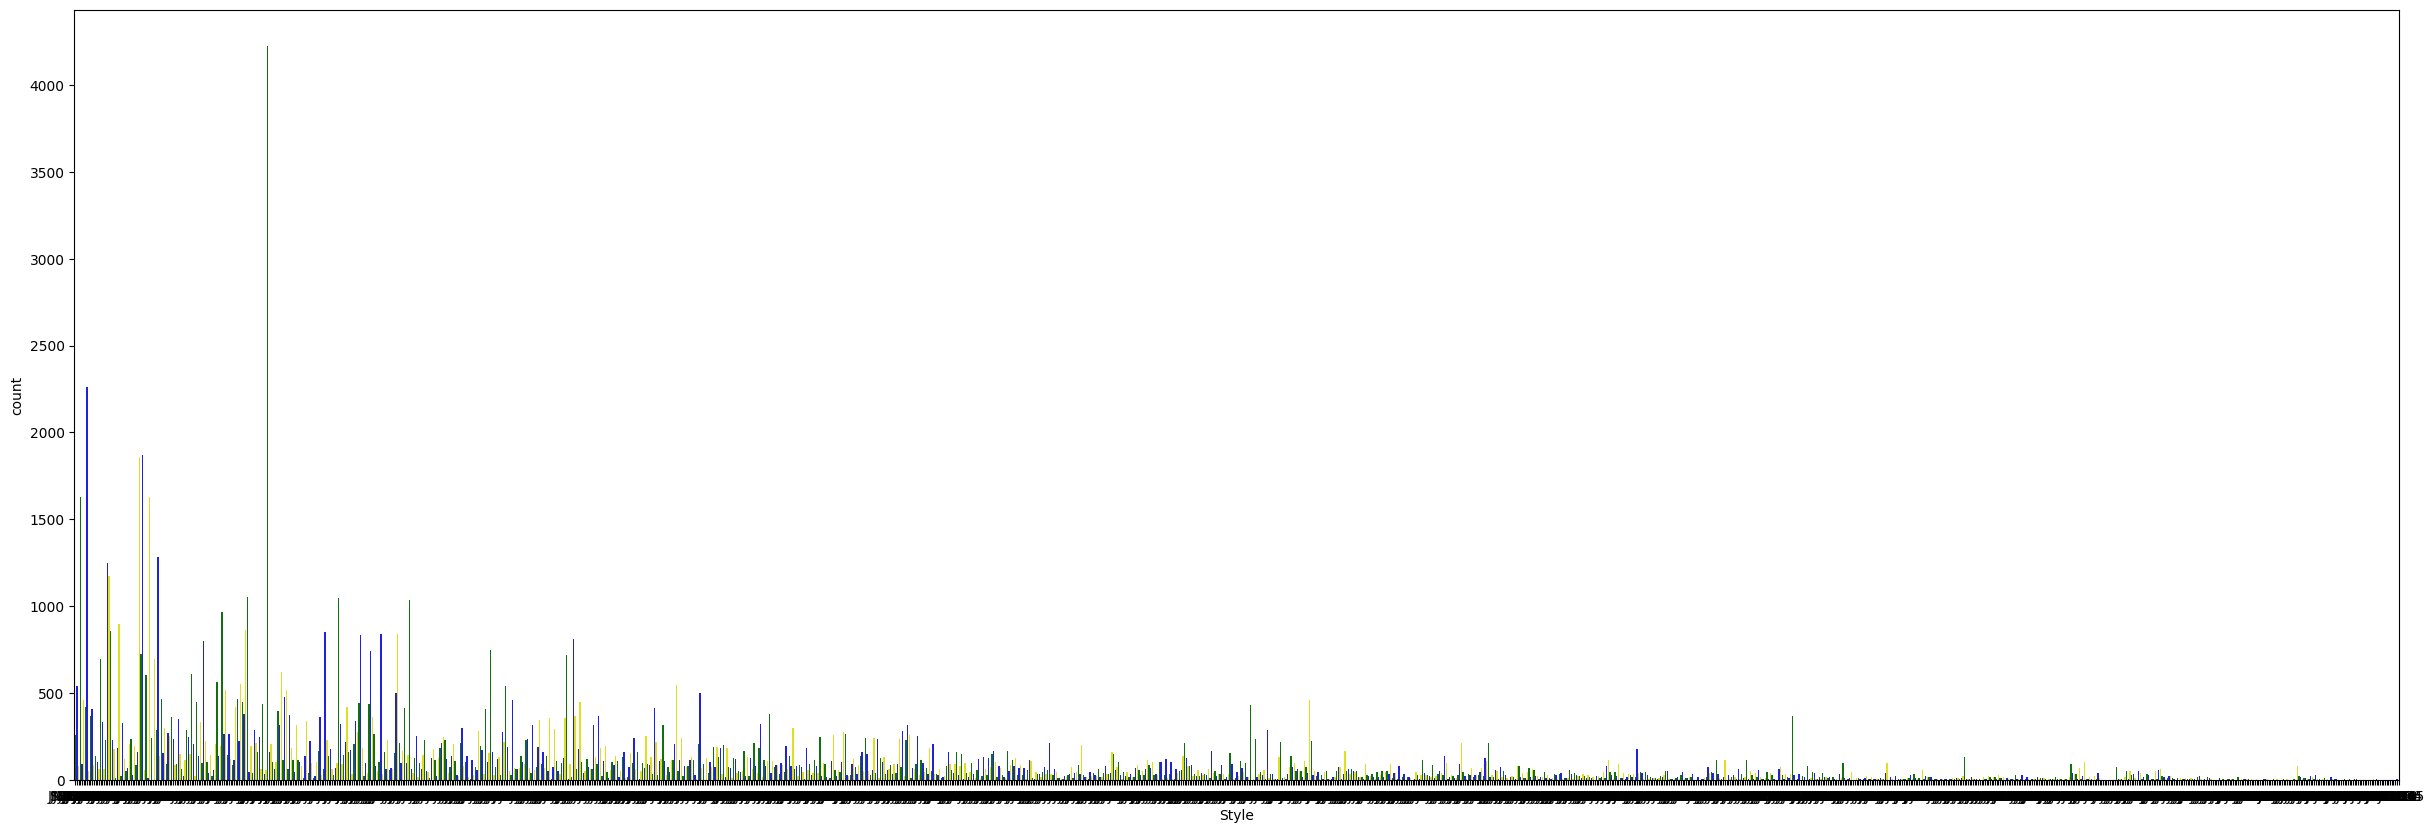

In [151]:
# check usefulness
# checking the frequency of each style
plt.figure(figsize=(30,10))
styles = sns.countplot(x='Style', data=df, palette=['green', 'blue', 'yellow'])
styles

In [152]:
# chekcing accruacy by verifying if a column is integer
# check validity by also knowing the number of integers in it
import numpy as np
nonintmask = df['Amount'].apply(lambda x: not isinstance(x, (int, np.integer)) or pd.isna(x))
nonintval = df[nonintmask]
nonintval.shape

(128975, 23)

<Axes: xlabel='Amount'>

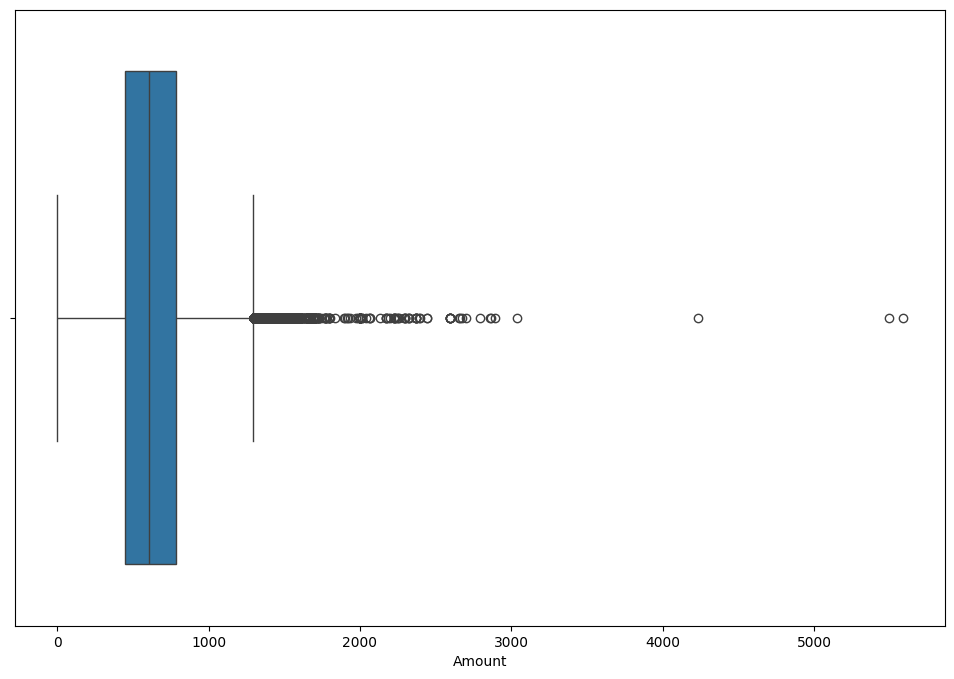

In [153]:
# check accuracy

# detect outliers using a chart
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Amount'])

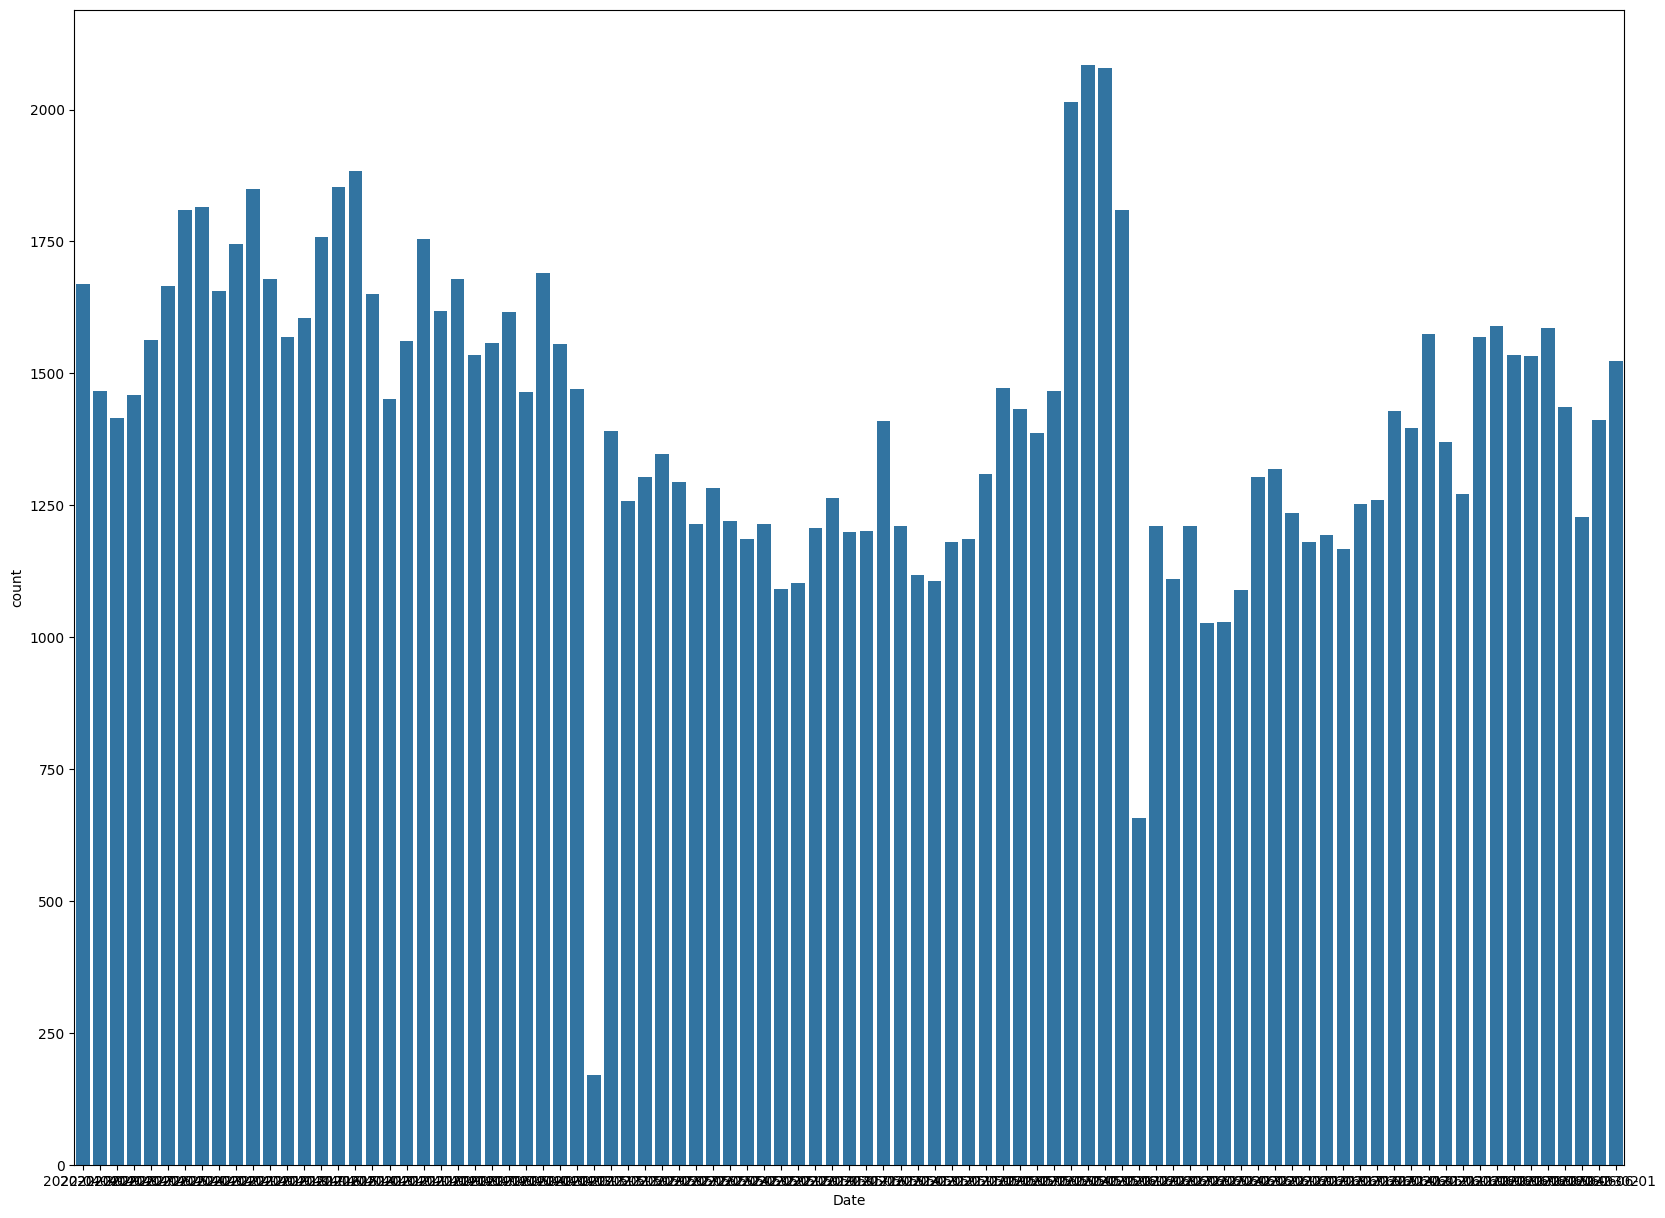

In [154]:
# check validity

# checking freqeuncy of dates
plt.figure(figsize=(20,15))
sns.countplot(x='Date', data=df)
plt.show()

In [155]:
# check validity
# count total null values in the dataset and in a specific column
totalnull = df.isna().sum().sum()
nullcountw = df['ship-city'].isna().sum().sum()
print(totalnull, nullcountw)

210495 33


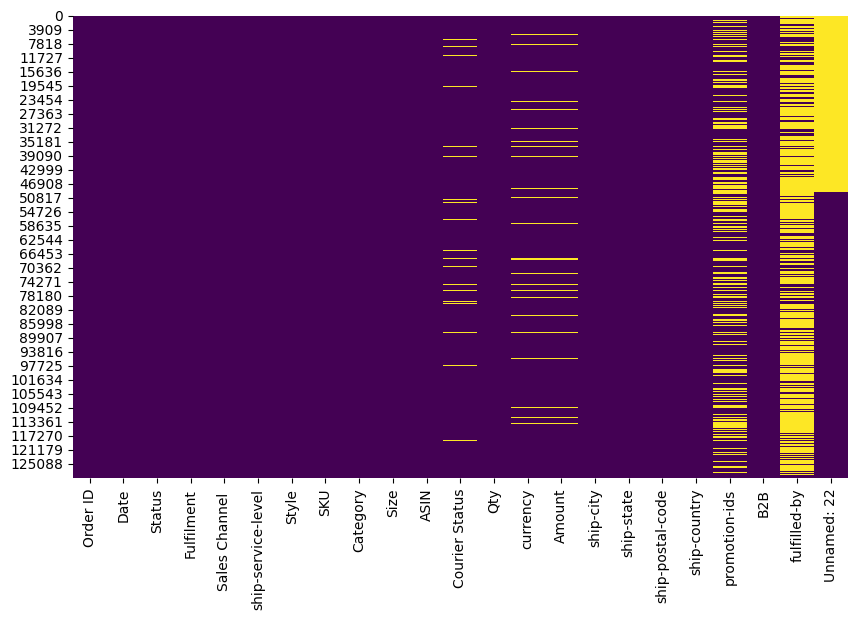

In [156]:
# check Completness of a dataset
# use heatmap to detect null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [157]:
# check reliability
# looking for a speific category in a column and its count
fdf = df[df['Category'] != 'Set']
fdf.shape

(78691, 23)

In [158]:
# verifying if a column is numeric
pd.api.types.is_numeric_dtype(df['Amount'])

True

In [159]:
# counts of column types in a dataset
df.dtypes.value_counts()

,count
object,17
float64,3
datetime64[ns],1
int64,1
bool,1


<Axes: xlabel='currency'>

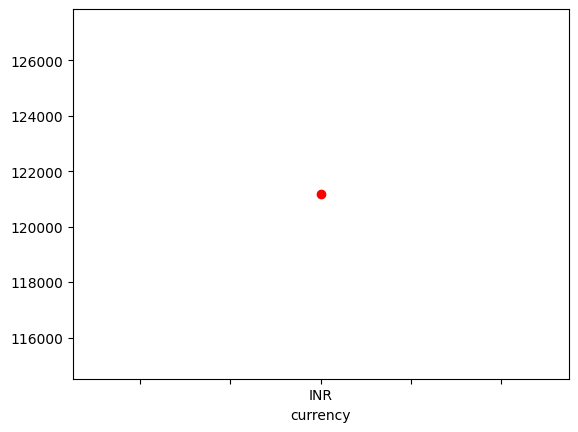

In [160]:
# check Credibilty

# checking for anomaly trend
coun = df['currency'].value_counts().sort_index()
coun.plot(kind='line', color='red', marker='o')

# there is only one currency

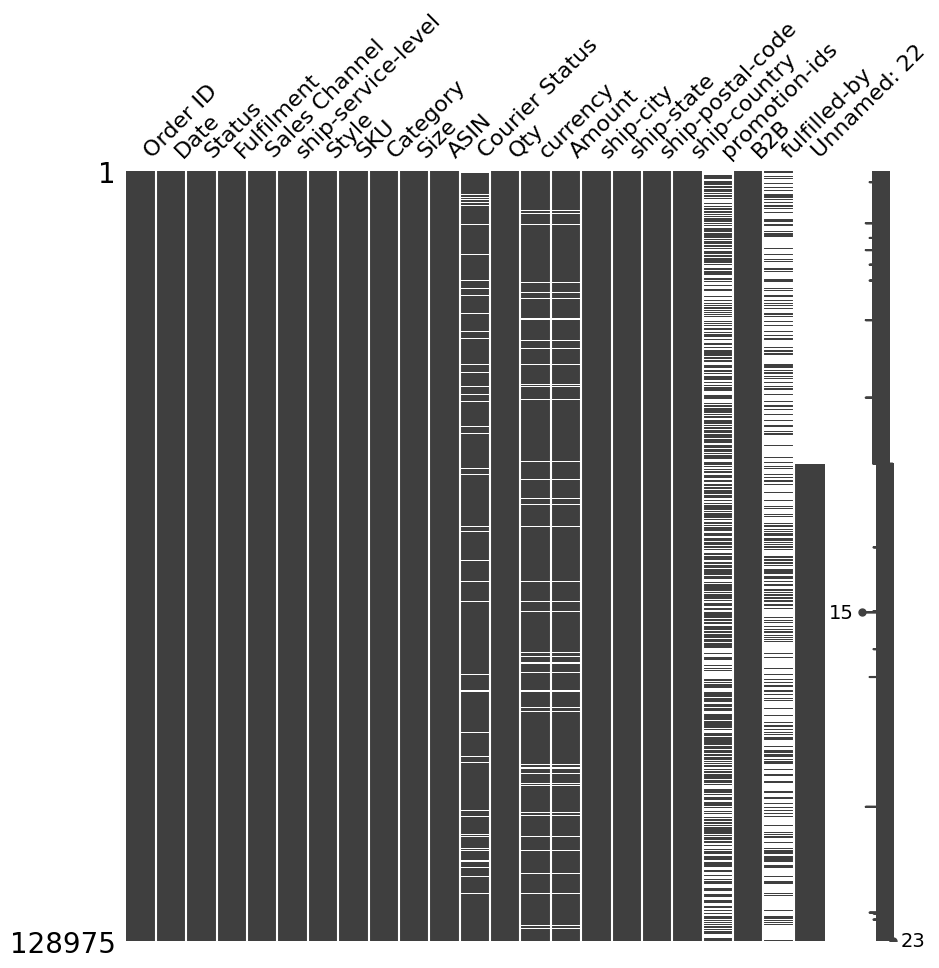

In [161]:
# check appropriatness of the dataset
# using missingno to look for null values
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

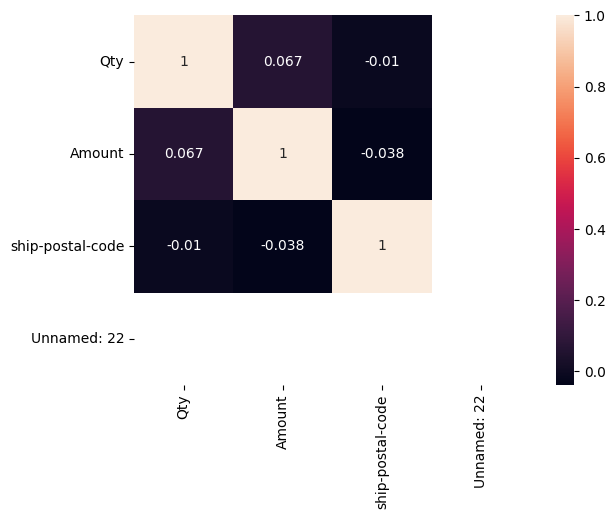

In [162]:
# check appropriatness by making correlaiton matrix for find relation between numeric columns
corrmatrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [163]:
# remove duplicates
df = df.drop_duplicates()
# remove null values
df = df.dropna()
df.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
49051,408-4858463-2356347,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0385,J0385-KR-M,kurta,M,B09YYNG98D,Shipped,1,INR,888.0,RAJAHMUNDRY,ANDHRA PRADESH,533126.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0.0
49077,402-7697834-2682766,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3654,JNE3654-TP-XXL,Top,XXL,B09B3GWVJ9,Shipped,1,INR,371.0,CHENNAI,TAMIL NADU,600042.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0.0
49081,402-7031777-0396341,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3798,JNE3798-KR-XS,Western Dress,XS,B09SDY7MHD,Shipped,1,INR,771.0,NEDUMANGAD,KERALA,695541.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,0.0


# 1) Percentage of orders for month in the year 2022

In [164]:
# check how many unique years we have

df['year'] = df['Date'].dt.year
years = df['year'].unique()
print(years)

[2022]


/tmp/ipython-input-164-982348971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Date'].dt.year


/tmp/ipython-input-165-2100315348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date'].dt.month


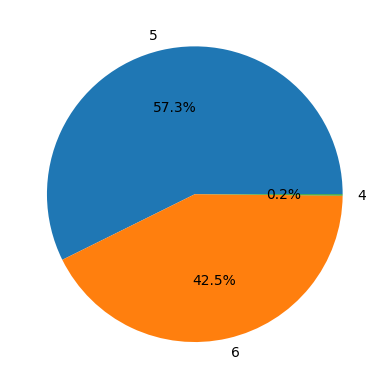

In [165]:
df['month'] = df['Date'].dt.month
b = df['month'].value_counts()*100
plt.pie(b, labels=b.index, autopct='%1.1f%%')
plt.show()

# 2) Frequency of each size in the cateogory Kurta

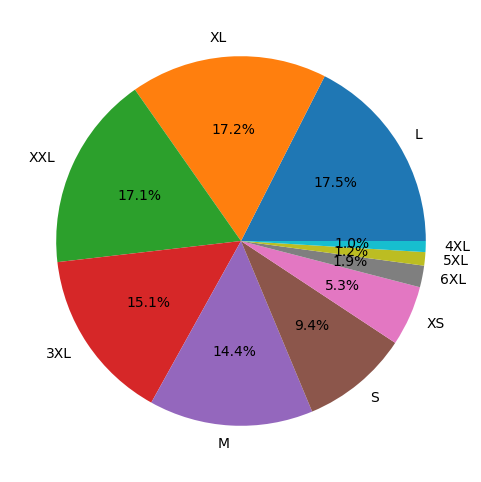

In [166]:
dfkurta = df[df['Category'] == 'kurta']
b = dfkurta['Size'].value_counts()*100
plt.figure(figsize=(6,6))
plt.pie(b, labels=b.index, autopct='%1.1f%%')
plt.show()

# 3) Percentage of easy ship fulfilling by category

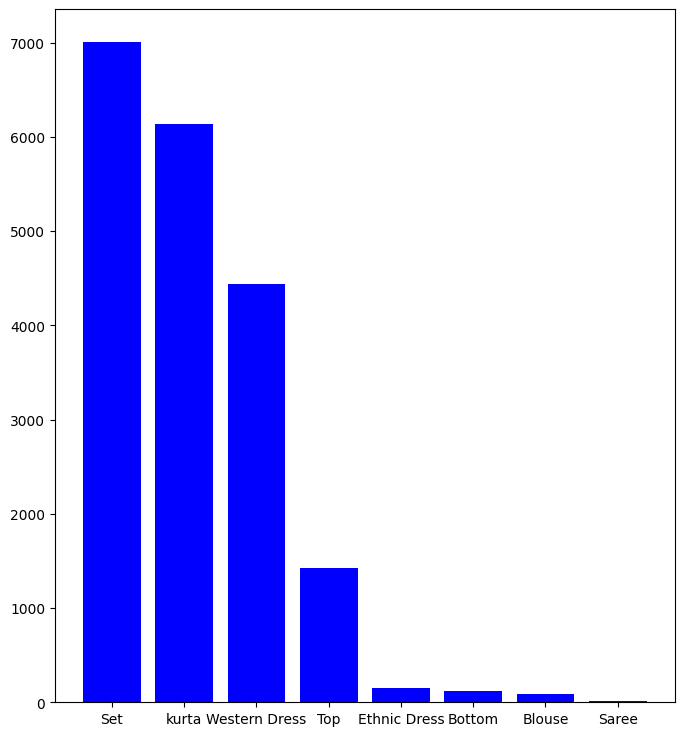

In [167]:
dfship = df[df['fulfilled-by'] == 'Easy Ship']

b = dfship['Category'].value_counts()
plt.figure(figsize=(8,9))
plt.bar(b.index, b.values, color='blue')
plt.show()

# 4) Analyze value counts of states

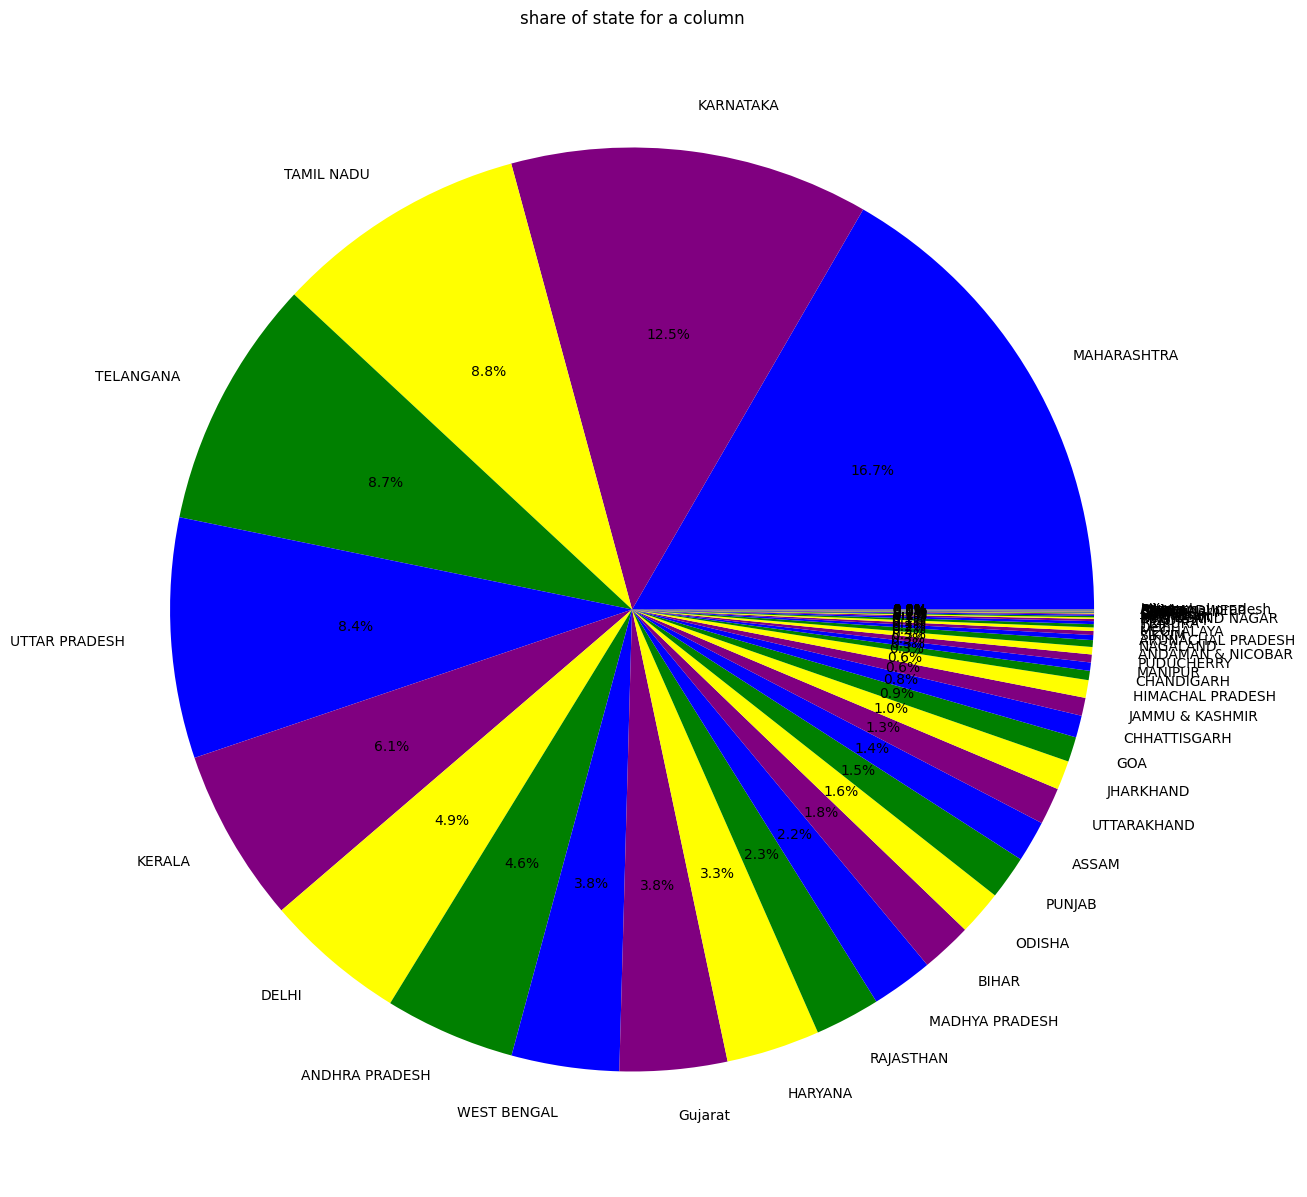

In [168]:
countrycounts = df['ship-state'].value_counts()
plt.figure(figsize=(15,15))
plt.pie(countrycounts, labels=countrycounts.index, autopct='%1.1f%%', colors=['blue', 'purple', 'yellow', 'green'])
plt.title("share of state for a column")
plt.show()

# 5) Amount for Category Kurta by month

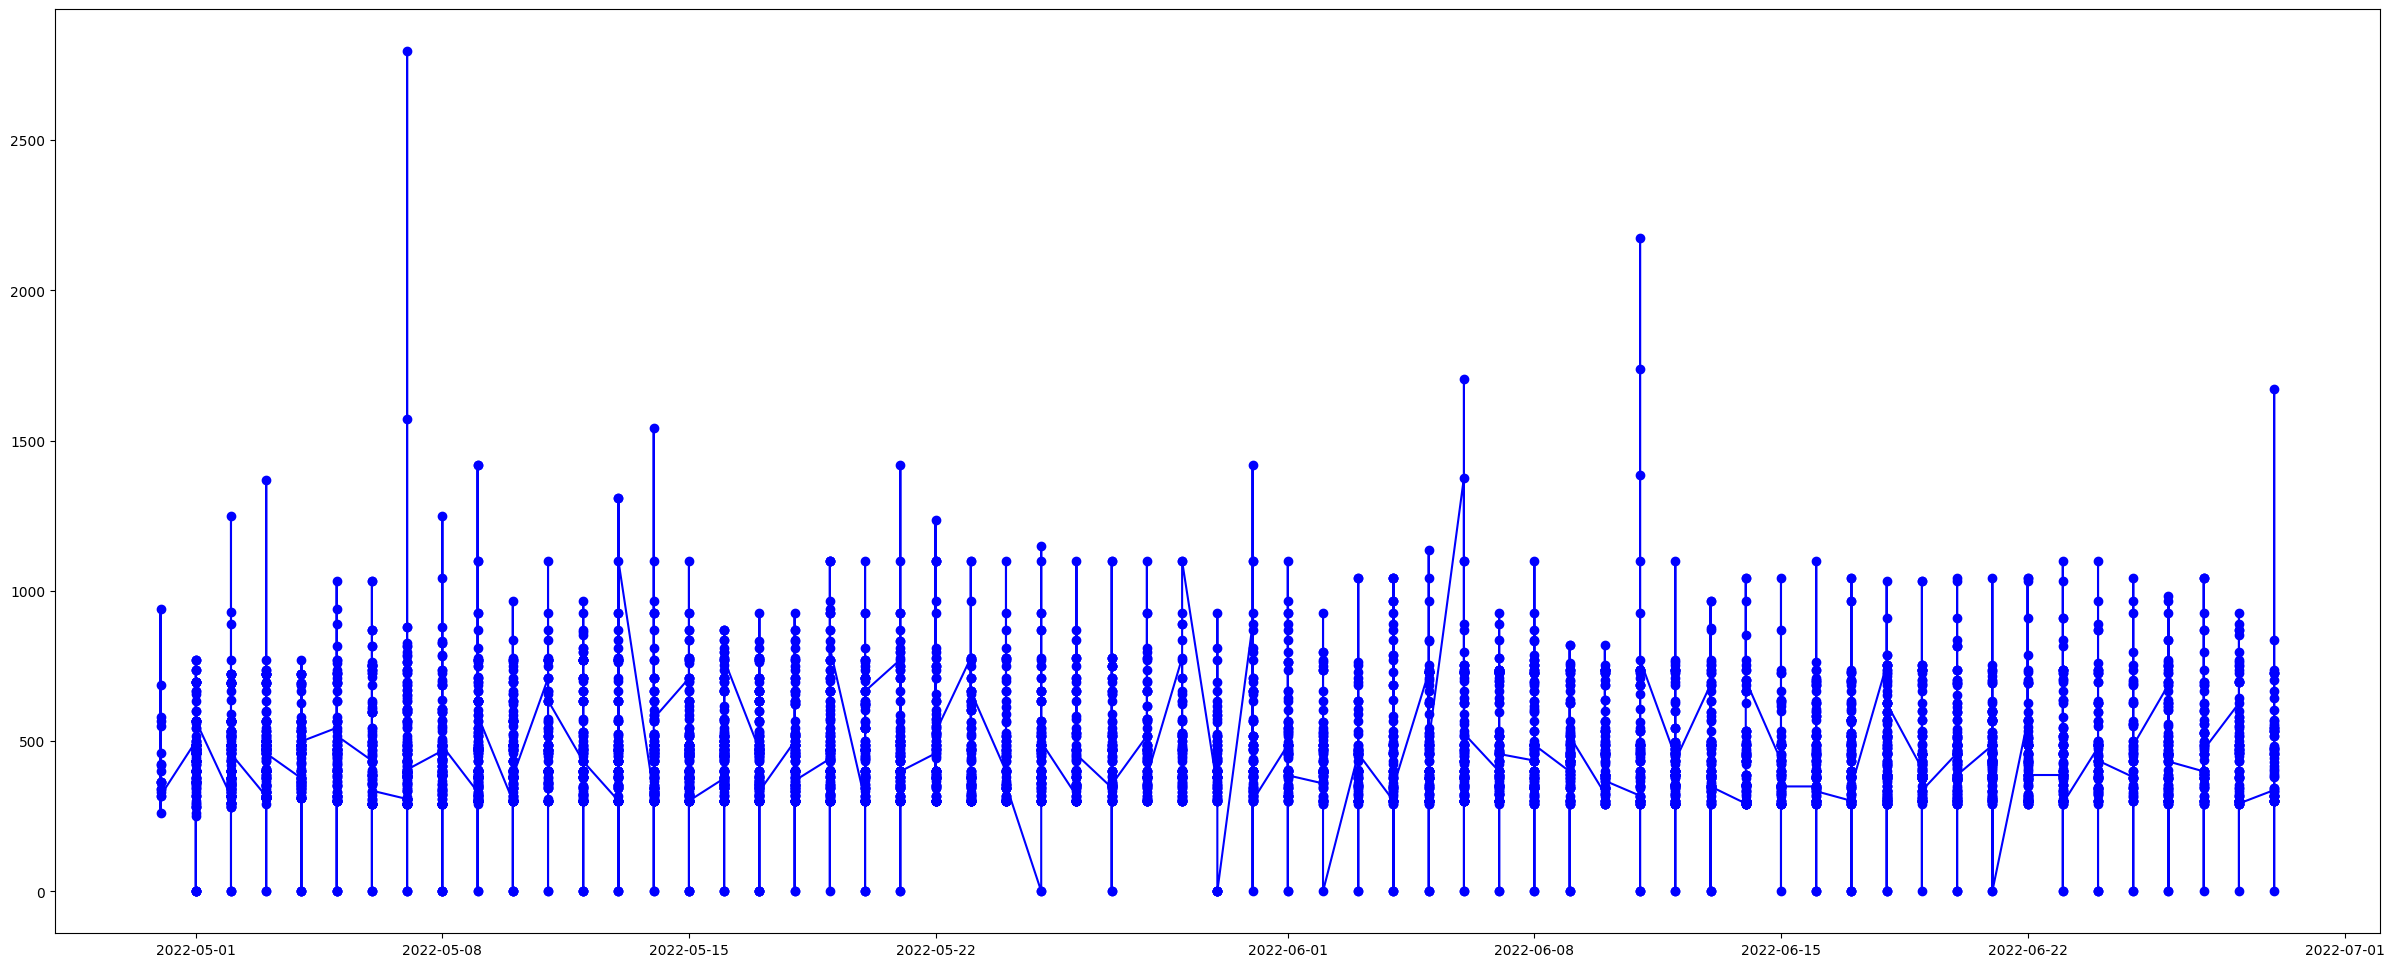

In [169]:
df['Date'] = pd.to_datetime(df['Date'])
dfcategory = df[df['Category'] == 'kurta']
plt.figure(figsize=(30,12))
dfcategory = dfcategory.sort_values(by='Date')
plt.plot(dfcategory['Date'], dfcategory['Amount'], marker='o', linestyle='-', color='blue')
plt.show()

# 6) The Amount of sale for each state in each month

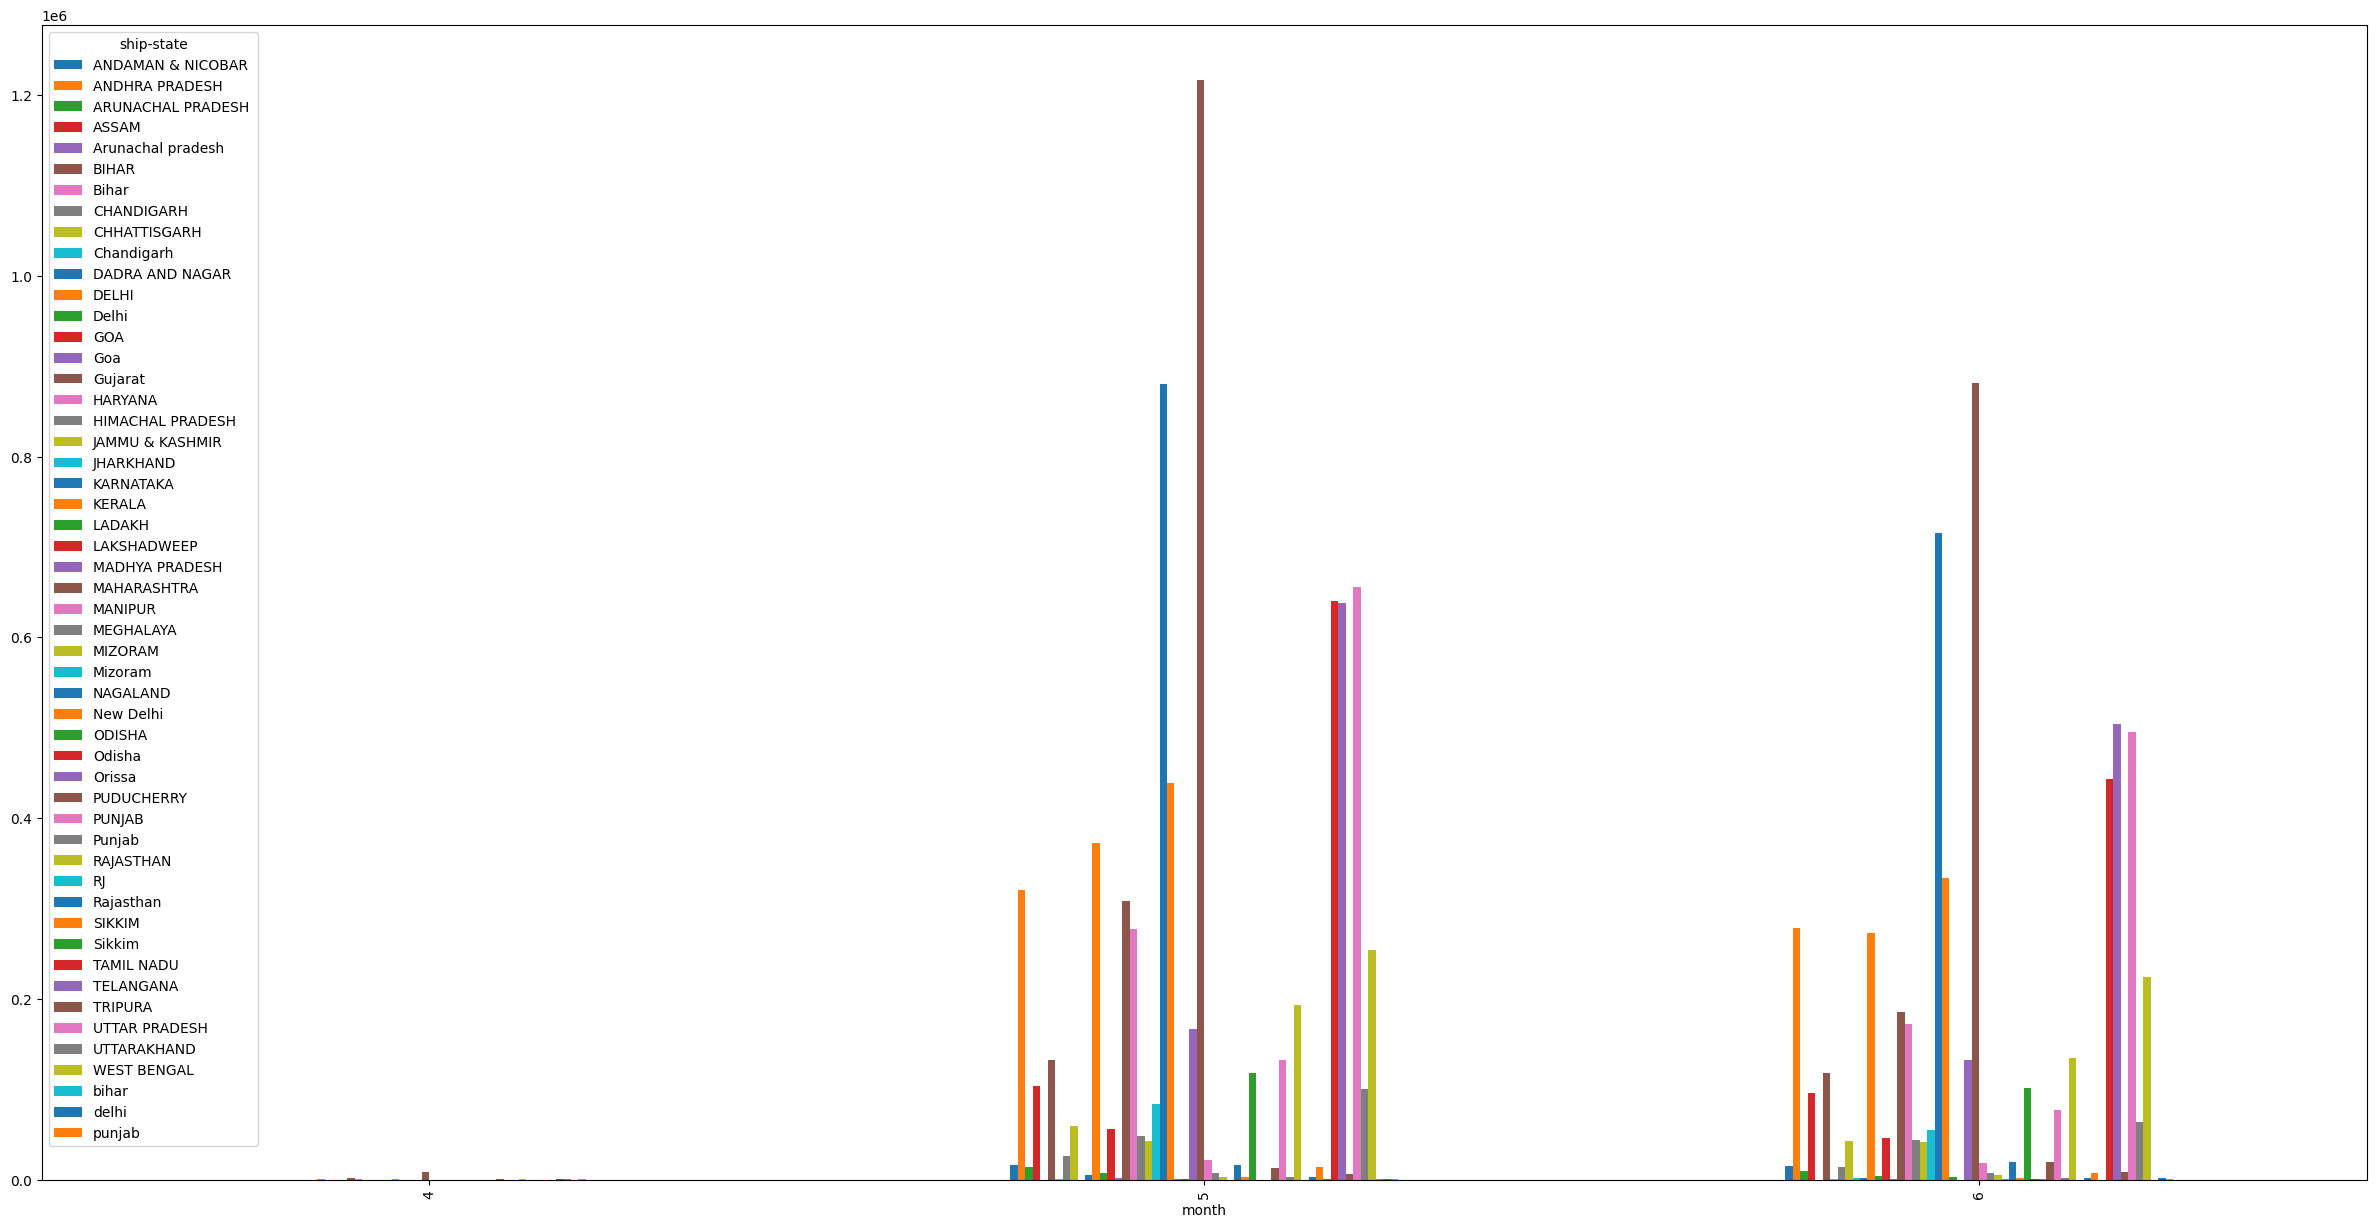

In [170]:
result = df.groupby(['month', 'ship-state'])['Amount'].sum().unstack()
result.plot(kind='bar', figsize=(30, 15))
plt.show()

# 7) Comparing States by amount of sale for each

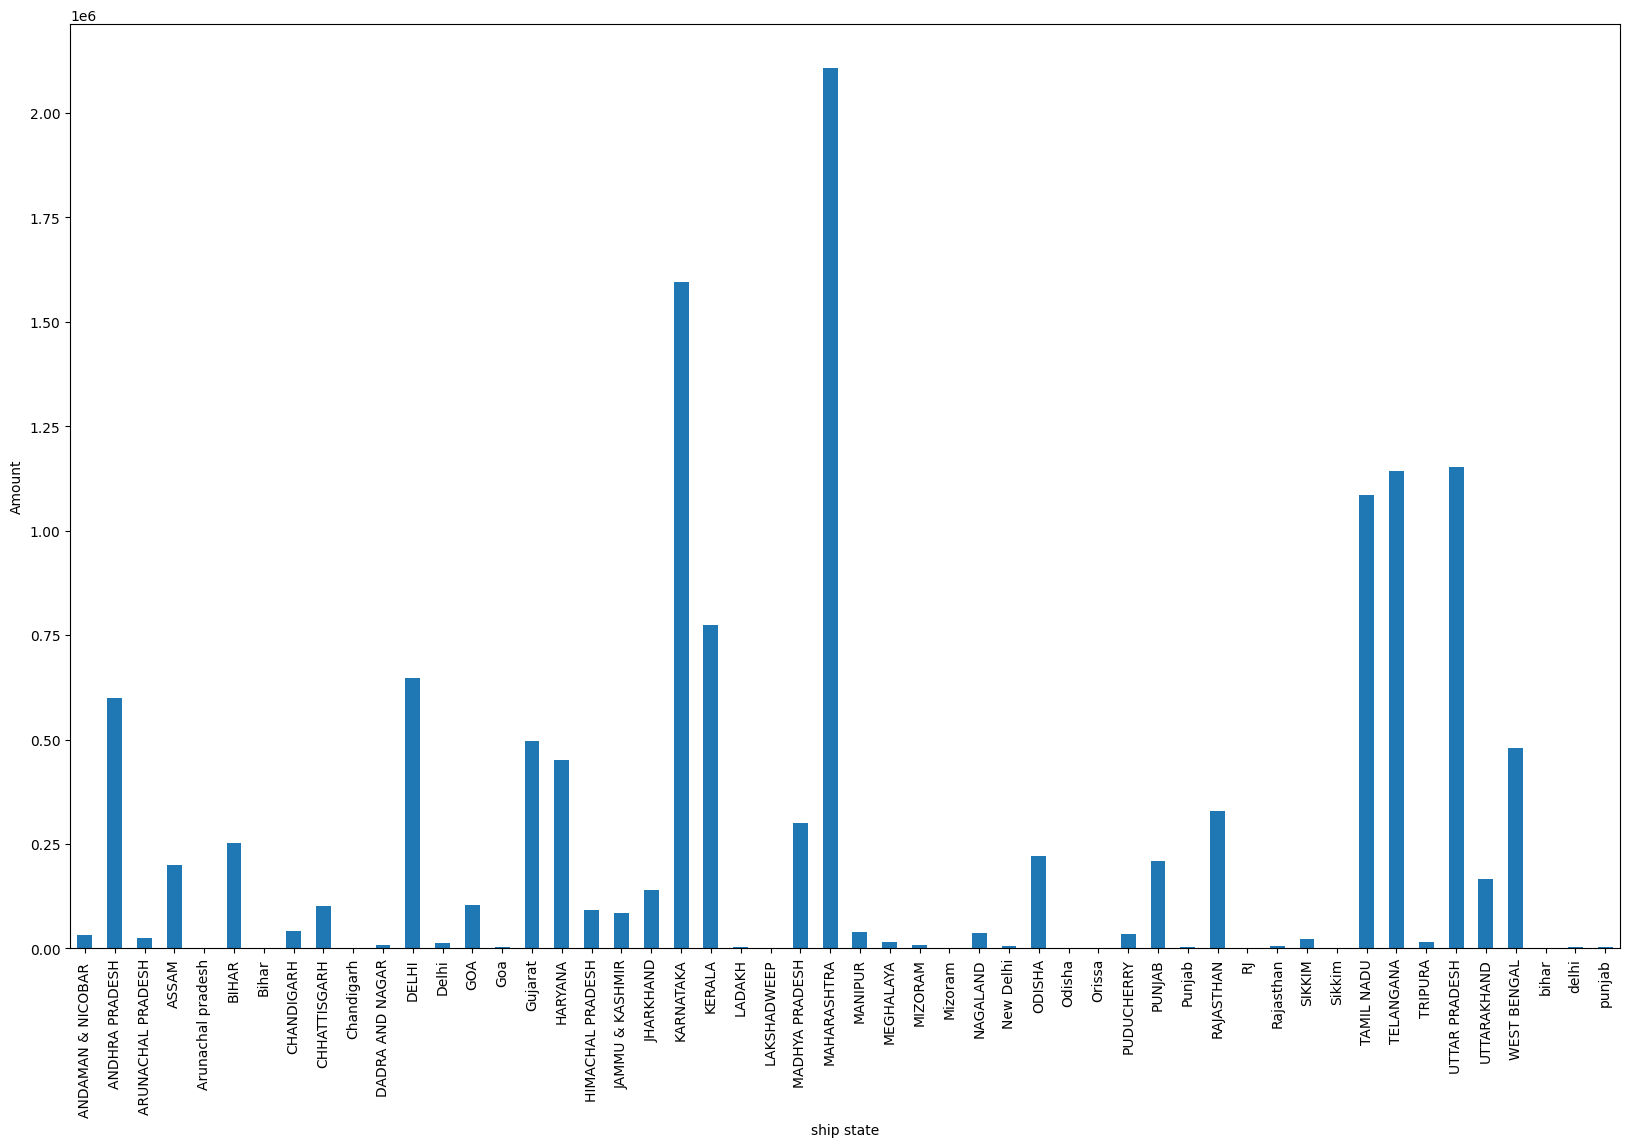

In [171]:
result = df.groupby('ship-state')['Amount'].sum()
result.plot(kind='bar', figsize=(20,12))
plt.xlabel('ship state')
plt.ylabel('Amount')
plt.show()

# 8) The amount of sale by category

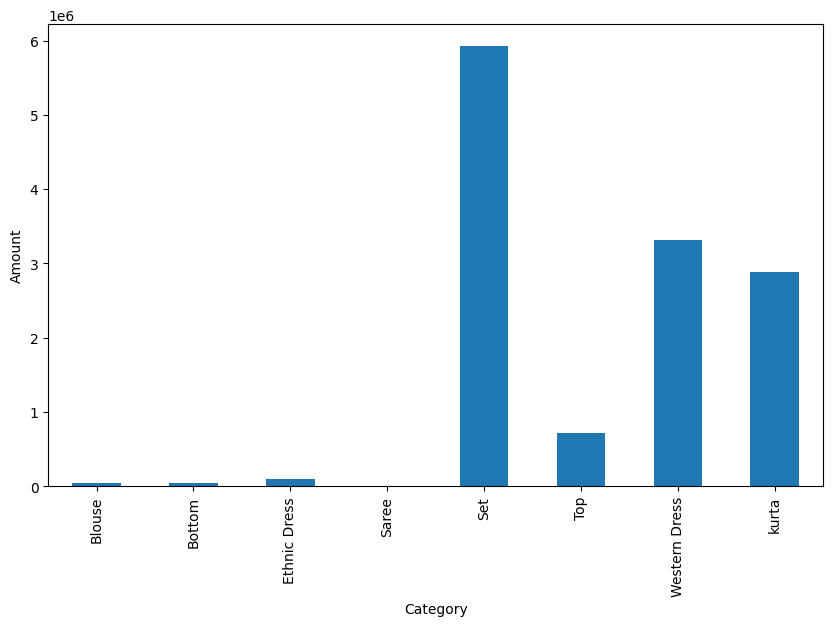

In [172]:
result = df.groupby('Category')['Amount'].sum()
result.plot(kind='bar', figsize=(10,6))
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

# 9) Amount of sales per month

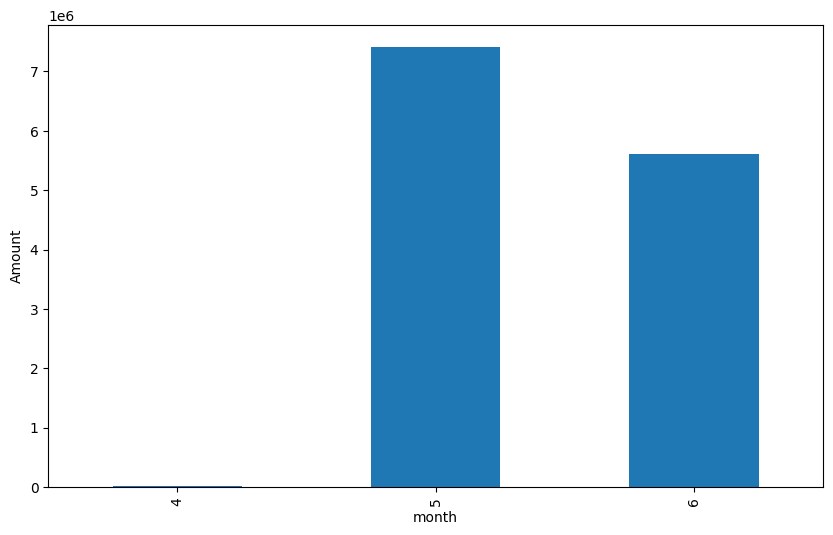

In [173]:
# bar chart
result = df.groupby('month')['Amount'].sum()
result.plot(kind='bar', figsize=(10,6))
plt.xlabel('month')
plt.ylabel('Amount')
plt.show()

ANil, (2022), Summary, Data.world, Available at: https://data.world/anilsharma87/sales, (Accessed : 04/04/2025)

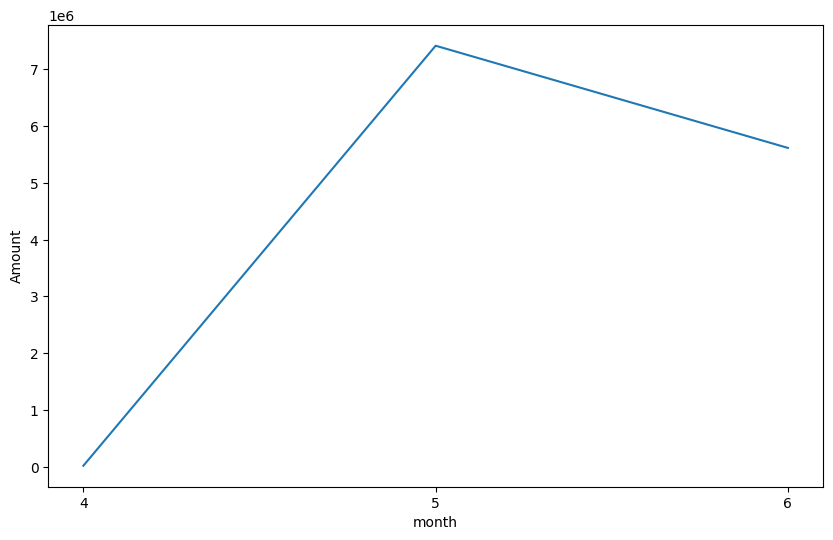

In [174]:
# bar chart
result.plot(kind='line', figsize=(10,6))
plt.xlabel('month')
plt.xticks([4, 5, 6])
plt.ylabel('Amount')
plt.show()

Dataset Reference:
ANil, (2022), Summary, Data.world, Available at: https://data.world/anilsharma87/sales, (Accessed : 04/04/2025)